<a href="https://colab.research.google.com/github/rajatlamsal00977/Project-1/blob/main/Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We took this block of code out straight from the project 4 where we used the Gaussian Elimination Method.

*   Rajat Lamsal
*   Bishnu Rijal
*   Pratim khadka




  Instructor: Nicolas Jachob.

  CPSMA 4413 NUMERICAL METHODS -01.

In [ ]:
import math ##importing modules
import numpy as np
import scipy.linalg as la

def Rows_add(matrix, T_row, M_row, value):
  newRow = matrix[T_row,:]+value*matrix[M_row,:]
  newMatrix = []
  for x in range(len(matrix)):  #using loop to go through each rows
    if x != T_row:
      newMatrix.append(matrix[x,:])
    else:
      newMatrix.append(newRow)
  return np.array(newMatrix)

def Leading(matrix,row,column):
  newMatrix =[]
  for x in range(len(matrix)):
    if x != row:
      newMatrix.append(matrix[x,:])
    else:
      newMatrix.append(1/matrix[row,column]*matrix[row,:])
  return np.array(newMatrix)

def gaussMethod(matrix):
  newMatrix = matrix
  for P in range(len(matrix)): 
    newMatrix = Leading(newMatrix,P,P)
    for C in range(0,P):
      newMatrix = Rows_add(newMatrix,C,P,-newMatrix[C,P])
    for C in range(P+1,len(matrix)):
      newMatrix = Rows_add(newMatrix,C,P,-newMatrix[C,P])
  return newMatrix

We are going to use the Direct Method to find the interpolation of the given points, the polynomial function is denoted by the form:
$$
f(x) = a_0+a_1x+a_2x^2+\cdots + a_n x^n
$$

The passing points on this function can be assumed to be $(x_0,y_0)$, by substituting the points the function takes the following form:

$$
a_0+a_1x_0+a_2 x_0^2+\cdots +a_n x_0^n = y_0
$$


Now we will be considering the function by using the Gaussian Elimination method, lets arrange them in matrix in order to apply the gaussian elimination.

$$
\left[
\begin{array}{ccccc|c}
1&x_0&x_0^2&\cdots&x_0^n&y_0\\
\vdots&&\ddots&&\vdots\\
1&x_{n-1}&x_{n-1}^2&\dots& x_{n-1}^n&y_{n-1}
\end{array}
\right]
$$

For this, We are going to use the function mentioned below:

$$
2x^3 + 3x^2 -11x -6
$$

we solved the equation using x as 0,1,2,3,4
therefore, our dataset will be 

[[0,-6],[1,-12],[2,6],[3,42],[4,126]]

In [ ]:

def Row_create(input, output, order): ## function to create rows using data points and order of the polynomial
  list = []
  for x in range(order+1):
    list.append(input**x)
  list.append(output)
  return list

In [ ]:

Row_create(1,3,4)

[1, 1, 1, 1, 1, 3]

In [ ]:
points = [[0,-6],[1,-12],[2,6],[3,42],[4,126]]

In [ ]:
def Create_matrix(pointsAsArray): #function to create a matrix using all the row created from each data points
  matrix = []
  order = len(pointsAsArray) - 1
  for x in range(len(pointsAsArray)):
    matrix.append(Row_create(pointsAsArray[x][0],pointsAsArray[x][1], order))
  return np.array(matrix)

In [ ]:
Create_matrix(points)

array([[  1,   0,   0,   0,   0,  -6],
       [  1,   1,   1,   1,   1, -12],
       [  1,   2,   4,   8,  16,   6],
       [  1,   3,   9,  27,  81,  42],
       [  1,   4,  16,  64, 256, 126]])

In [ ]:
gaussMethod(Create_matrix(points))[:,-1]

string = ''
for x in range(len(gaussMethod(Create_matrix(points))[:,-1])):
  coefficient = gaussMethod(Create_matrix(points))[x,-1]
  string = string + '+{}'.format(coefficient) +r'x^{}'.format(x)

string

'+-6.0x^0+-29.0x^1+31.5x^2+-10.0x^3+1.5x^4'

In [ ]:
def Spline_direct(pointsAsArray, variable): ## fucntion to find f(x) for each x using only the data points 
  coefficients = gaussMethod(Create_matrix(pointsAsArray))[:,-1]
  value =0;
  for x in range(len(coefficients)):
    value = value + coefficients[x]*variable**x
  return value

In [ ]:
Spline_direct(points,3)

42.0

<function matplotlib.pyplot.show>

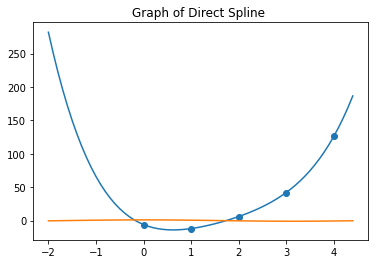

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(-2,4.5,.1)
plt.scatter(np.array(points)[:,0],np.array(points)[:,1])
plt.plot(x, Spline_direct(points, x))
plt.plot(x,np.cos(x))
plt.title('Graph of Direct Spline ')

plt.show

Linear Splines is the method where the given data points are calculated by connecting the two consecutive data points with one another using a straight line.


In [ ]:
def divide(function,lower,upper,numberOfDivisions): #function to divide the limit into equal interval
  interval = (upper - lower)/(numberOfDivisions - 1)
  array = []
  for i in range(numberOfDivisions):
    x = lower + i*interval
    array.append([x,function(x)])
  return np.array(array)



In [ ]:
def slope(I_point,F_point): #function to calculate slope
  return (F_point[1]-I_point[1])/(F_point[0]-I_point[0])

In [ ]:
def Spline_linear(points,input):
  x = points[:,0]
  y = points[:,1]
  for i in range(len(x)-1):
    if (x[i]< input) & (input < x[i+1]):
      return y[i]+ slope(points[i,:],points[i+1,:])*(input - x[i])
    else:
      continue

In [ ]:
fiveCoordinates = divide(np.cos,0,2*np.pi,5)

Spline_linear(fiveCoordinates,1)

0.36338022763241873

Now, to create a graph of the function and linear spline using the five points we used 

In [ ]:
x = np.arange(0,6.35,0.1)
y = [Spline_linear(fiveCoordinates,x) for x in x]

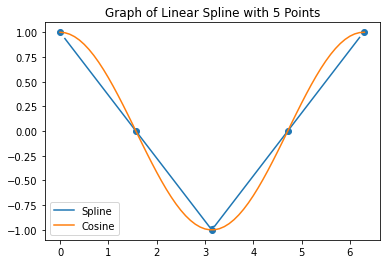

In [ ]:
plt.scatter(fiveCordinates[:,0],fiveCordinates[:,1])
plt.plot(x,y)
plt.plot(x, np.cos(x))
plt.title('Graph of Linear Spline with 5 Points')
plt.legend(['Spline','Cosine'])


plt.show()

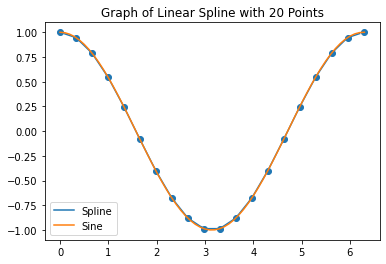

In [ ]:
twentycoordinates = divide(np.cos,0,2*np.pi,20)
x = np.arange(0,6.35,0.1)
y = [Spline_linear(twentycoordinates,x) for x in x]
plt.scatter(twentycoordinates[:,0],twentycoordinates[:,1])
plt.plot(x,y)
plt.plot(x, np.cos(x))
plt.title('Graph of Linear Spline with 20 Points')
plt.legend(['Spline','Sine'])


plt.show()

Based on our graph we can deduce that the accuracy of linear spline graph increases as we try to increase the numebr of interval in between.

Now to graph the direct spline with 20 points 

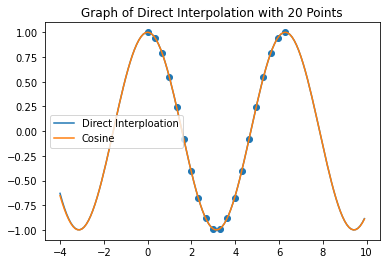

In [ ]:

x = np.arange(-4,10,0.1)

plt.scatter(twentycoordinates[:,0],twentycoordinates[:,1])
plt.plot(x,Spline_direct(twentycoordinates,x))
plt.plot(x, np.cos(x))
plt.title('Graph of Direct Interpolation with 20 Points')
plt.legend(['Direct Interploation','Cosine'])

As the window of the graph is extended, we can see that the graph of the interpolation starts to deviate from the graph of the function.

Here in module 5, we have done algebric calculationsusing scipy which helps to convert the arrays. Here inthe project we have used the gauss jordan algrothim from the previous module and created unique points in the graph.The first graph shows the direct spines.The other graph is the graph of 20 points along with the cosine function.

It is believed that if we had chosen the midway point between the spines , we wouldnot have found the intersections. further more in other graphs  the answers wouldnt have been precise if it the point was in the midway.

we believe the answer would be same , if the points were far from the window.
